In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station =  Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())[0]
recent_date

'2017-08-23'

2016-08-23


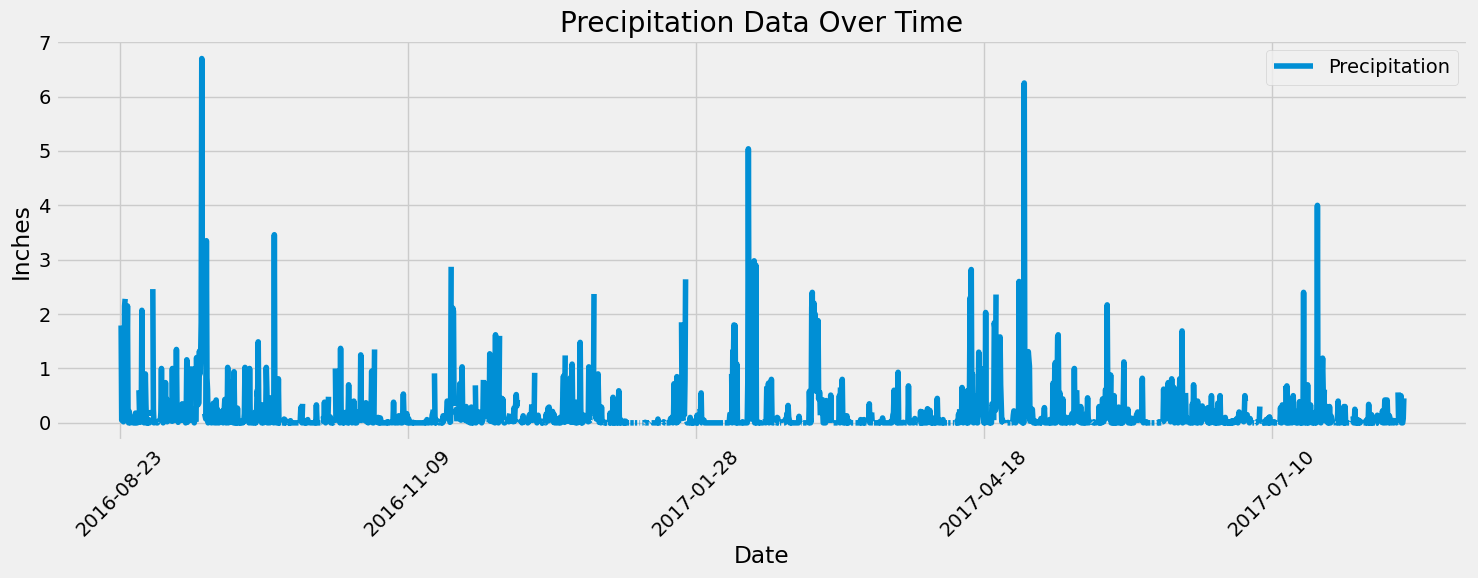

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = session.query(func.max(Measurement.date)).scalar()

date_one_yr_ago_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')
print(query_date)
#recent_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
#one_year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_one_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()

#print(last_one_year_precipitation)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_one_year_precipitation, columns=['Date','Precipitation'])
df.set_index('Date',inplace=True)
df.head(10)

# Sort the dataframe by date
df_sorted = df.sort_values('Date')
df_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(y='Precipitation', figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Data Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_summary = session.query((func.min(Measurement.tobs)),(func.max(Measurement.tobs)), (func.avg(Measurement.tobs))).filter(Measurement.station == 'USC00519281').all()
temp_summary

[(54.0, 85.0, 71.66378066378067)]

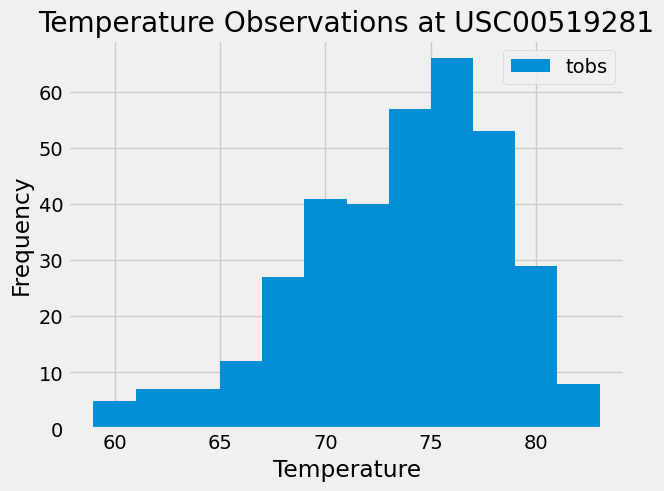

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_one_year_temperature= session.query(Measurement.date,Measurement.tobs).\
            filter((Measurement.date >= '2016-08-23'),(Measurement.station == 'USC00519281')).all()
last_one_year_temperature
df_temp = pd.DataFrame(last_one_year_temperature, columns=['Date', 'Temperature'])
df_temp.head(12)

plt.hist(df_temp['Temperature'],bins=12, density=False, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

Close Session


In [16]:
# Close Session
session.close()